# Outliers

## Detecting Outliers

There are several methods used to detect outliers:
- Visualized-Based Methods: Plotting scatter plot or box plots to see data distribution and inspect it for abnormal data points
- Statistics-Based Methods: These approaches involve Z-scores and IQR which offer reliability but may be less intrusive.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Generate random data
np.random.seed(108)

data = pd.DataFrame({
    "value": np.random.normal(0, 1, 1000)
})

In [3]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (data < lower_bound) | (data > upper_bound)

In [4]:
# Detect outliers
outliers = detect_outliers_iqr(data["value"])

print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 13


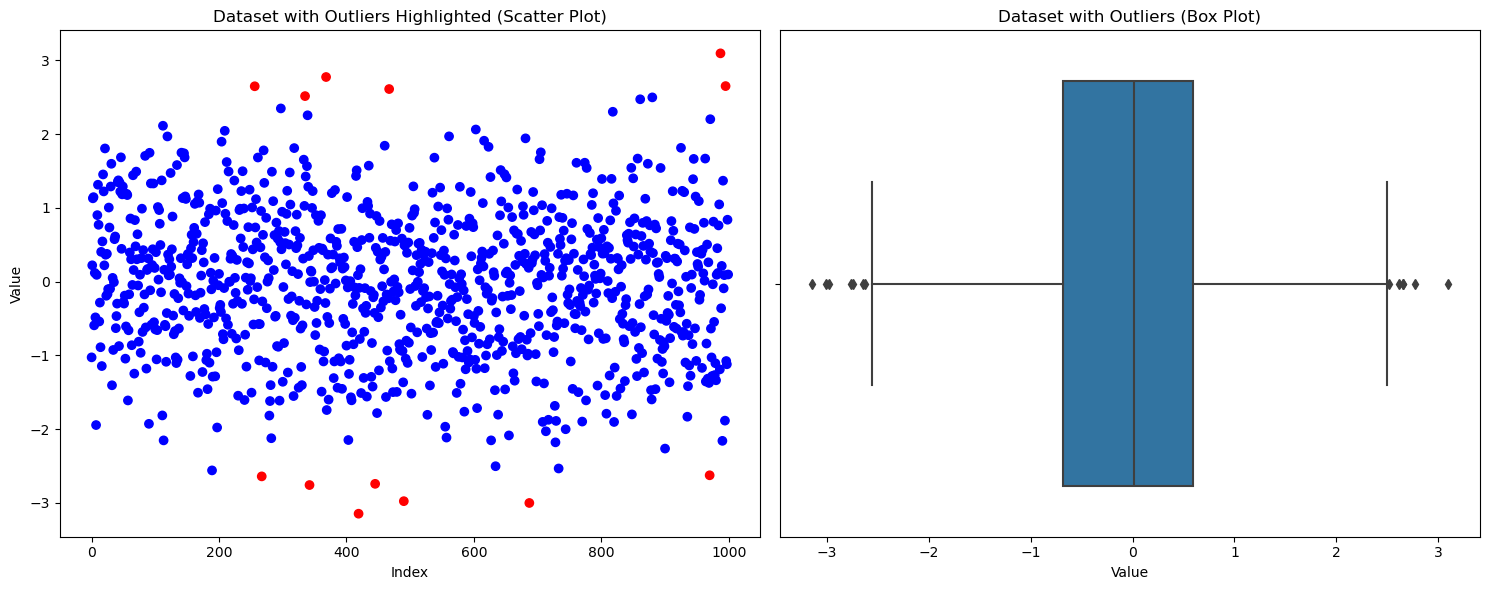

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter Plot
ax1.scatter(range(len(data)), data["value"], c=["blue" if not x else "red" for x in outliers])
ax1.set_title("Dataset with Outliers Highlighted (Scatter Plot)")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

# Box Plot
sns.boxplot(x=data["value"], ax=ax2, orient="h")
ax2.set_title("Dataset with Outliers (Box Plot)")
ax2.set_xlabel("Value")

plt.tight_layout()
plt.show()

## Handling Outliers

In [7]:
# Remove outliers
data_no_outliers = data[~outliers]

print(f"Original dataset size: {len(data)}")
print(f"Cleaned dataset size: {len(data_no_outliers)}")

Original dataset size: 1000
Cleaned dataset size: 987


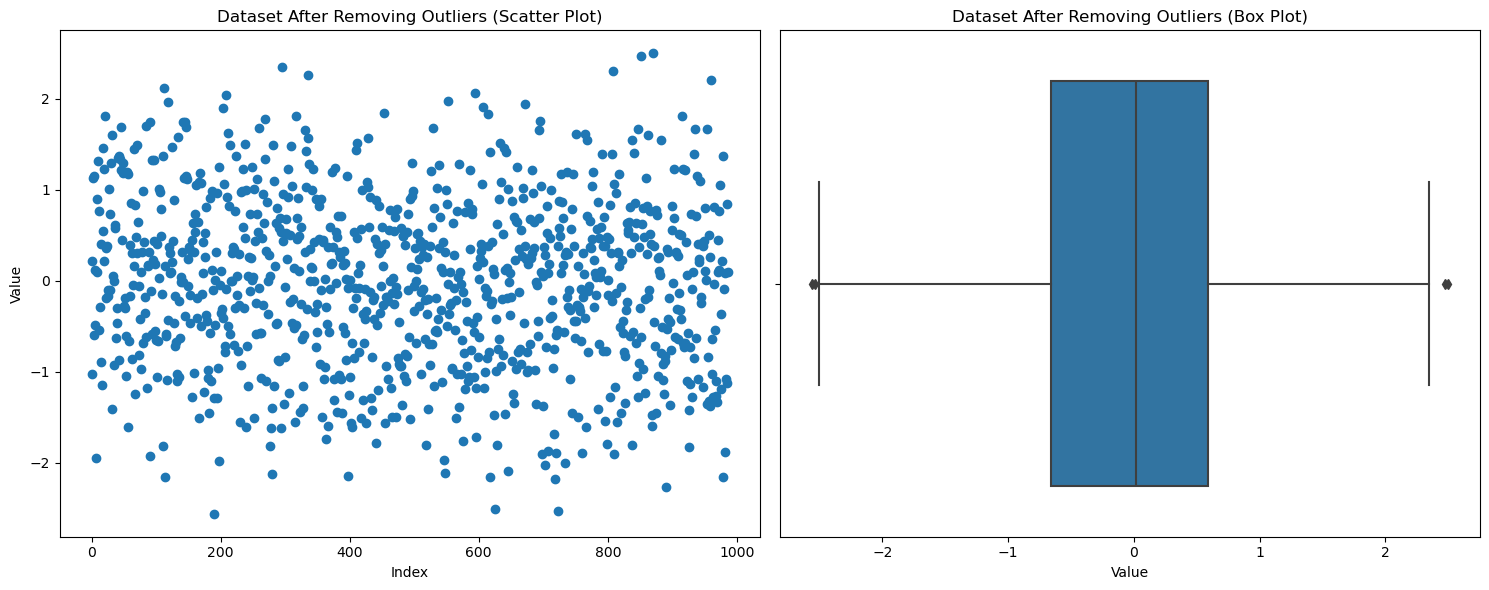

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter Plot
ax1.scatter(range(len(data_no_outliers)), data_no_outliers["value"])
ax1.set_title("Dataset After Removing Outliers (Scatter Plot)")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

# Box Plot
sns.boxplot(x=data_no_outliers["value"], ax=ax2)
ax2.set_title("Dataset After Removing Outliers (Box Plot)")
ax2.set_xlabel("Value")

plt.tight_layout()
plt.show()

## Reference  
[KD Nugget](https://www.kdnuggets.com/how-to-handle-outliers-in-dataset-with-pandas)